In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

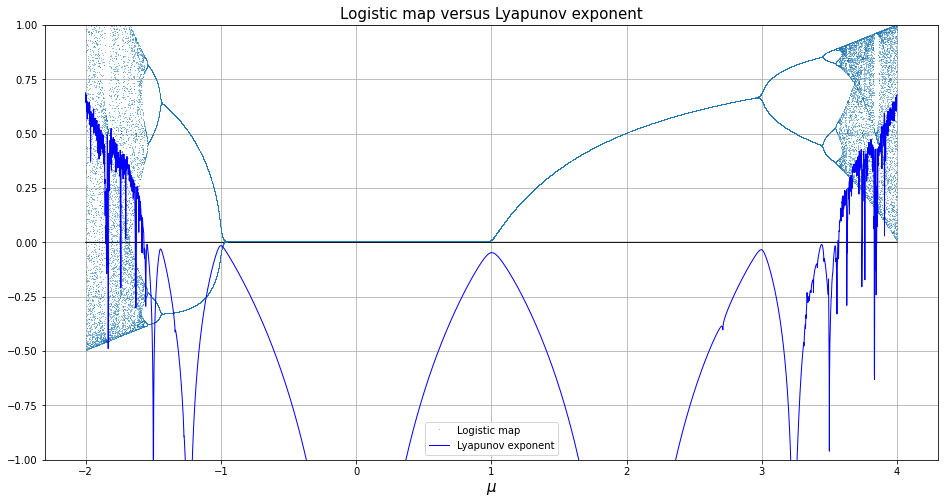

In [2]:
num_points = 16000
result = []
lambdas = []
maps = []
xmin, xmax = -2, 4
mult = (xmax - xmin) * num_points

mu_values = np.arange(xmin, xmax, 20/num_points)

for r in mu_values:
    x = 0.1
    result = []
    for t in range(100):
        x = r * x * (1 - x)
        result.append(np.log(abs(r - 2*r*x)))
    lambdas.append(np.mean(result))
    # Ignore first 100 iterates.
    for t in range(20):
        x = r * x * (1 - x)
        maps.append(x)

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,1,1)

xticks = np.linspace(xmin, xmax, mult)
zero = [0] * mult
ax1.plot(xticks, zero, 'k-', linewidth=1)
ax1.plot(xticks, maps,',', alpha = 0.51, label='Logistic map')
ax1.set_xlabel('r')
ax1.plot(mu_values,lambdas, 'b-', linewidth=1, label='Lyapunov exponent')
ax1.grid('on')
ax1.set_ylim(-1, 1)
ax1.set_xlabel('$\mu$', fontsize=15)
ax1.legend(loc='best')
ax1.set_title('Logistic map versus Lyapunov exponent', fontsize=15)
plt.show()

In [3]:
def lyapunov(f,n,iterations,last, r_min=0):    #step=last
    r = np.linspace(r_min, 4.0, n)
    x = 1e-5 * np.ones(n)
    lyapunov = np.zeros(n)
    
    fig, (ax1) = plt.subplots( figsize=(16,10),sharex=True)
    for i in range(iterations):
        x = f(r, x)
        lyapunov += np.log(abs(r - 2 * r * x))# Lyapunov exponent.
        if i >= (iterations - last):
            ax1.plot(r, x, ',b', alpha=.25)

    ax1.axhline(0., color='g', lw=.5, alpha=.5)# Horizontal line.
    ax1.plot(r[lyapunov < 0],lyapunov[lyapunov < 0] / iterations,'.k',alpha=.5,ms=.5)
    ax1.plot(r[lyapunov >= 0],lyapunov[lyapunov >= 0] / iterations,'.r',alpha=.5,ms=.5)
    ax1.set_xlim(r_min, 4)
    ax1.set_ylim(-2, 1.1)
    #ax1.grid('on')
    plt.tight_layout()

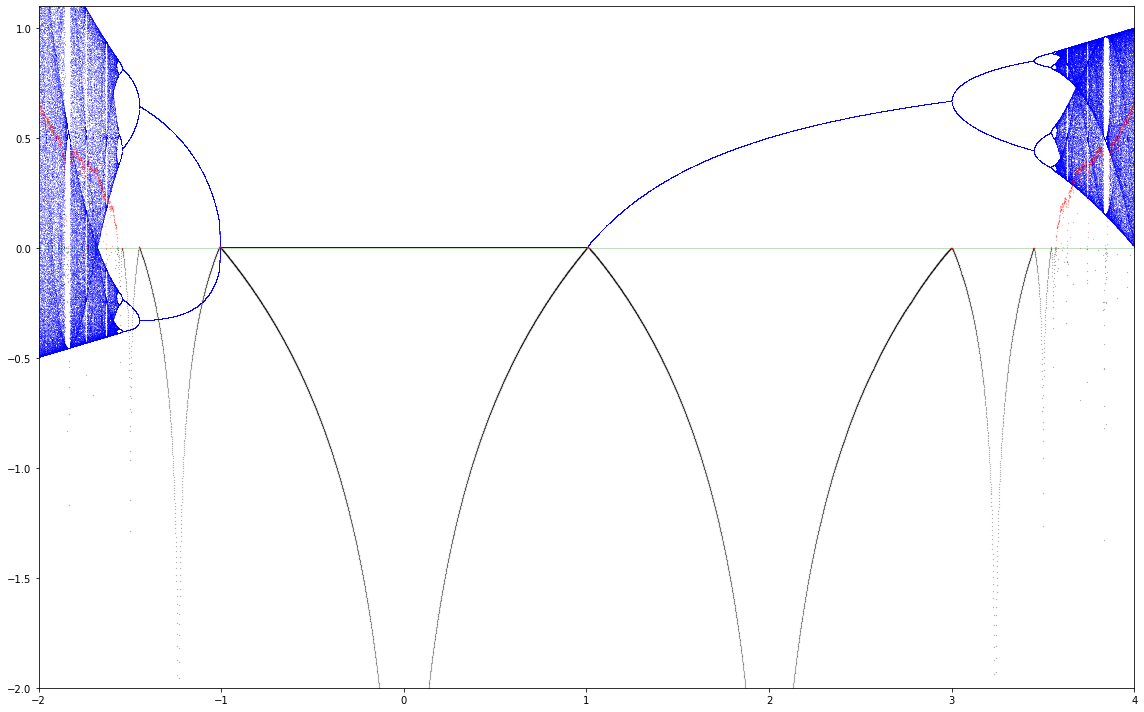

In [4]:
f=lambda r,x:r*x*(1-x)
lyapunov(f,10000, 1000, 100, -2.)

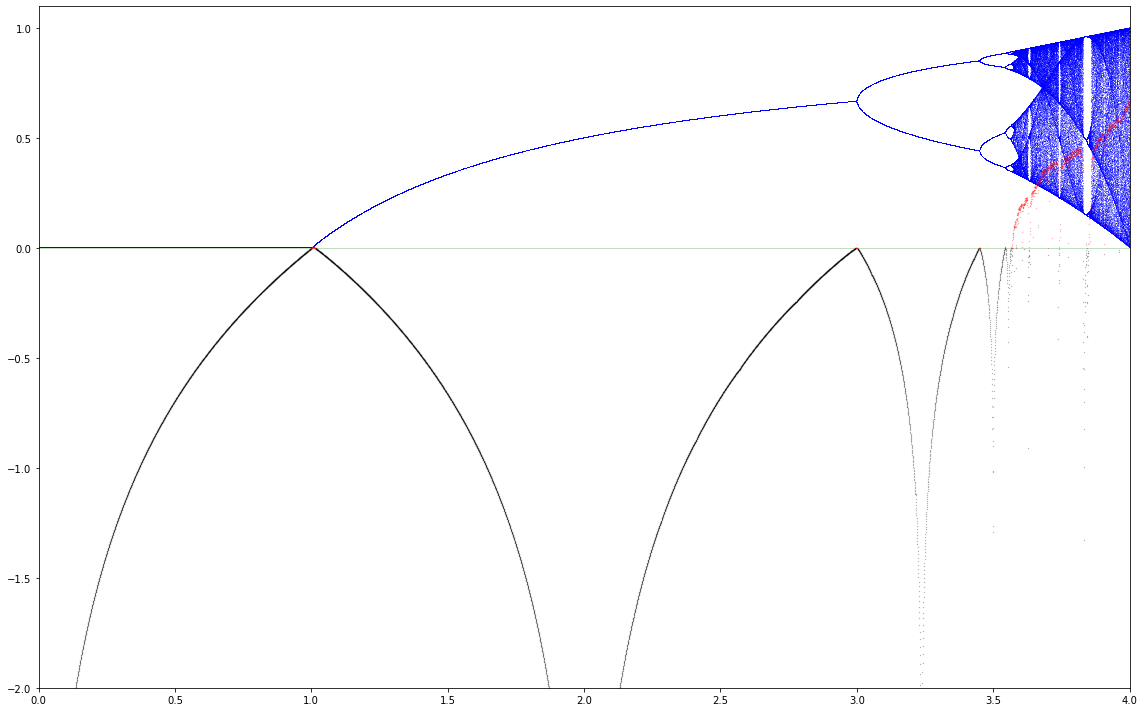

In [5]:
lyapunov(f,10000, 1000, 100, 0.)

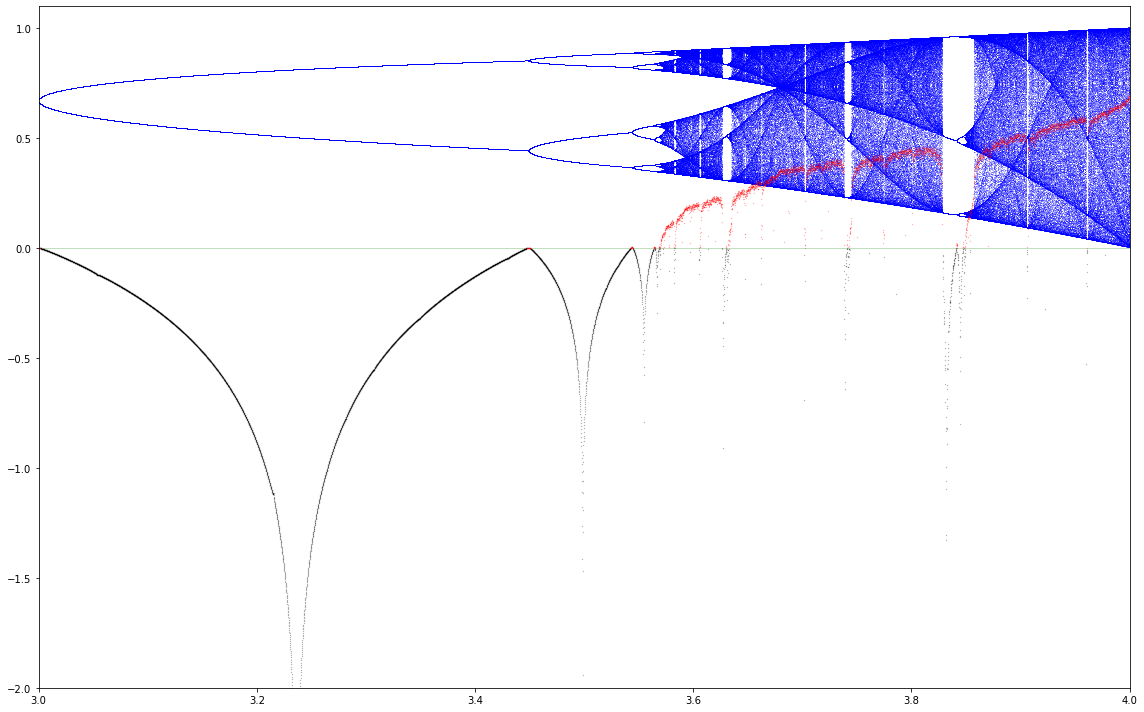

In [6]:
lyapunov(f,10000, 1000, 100, 3.)

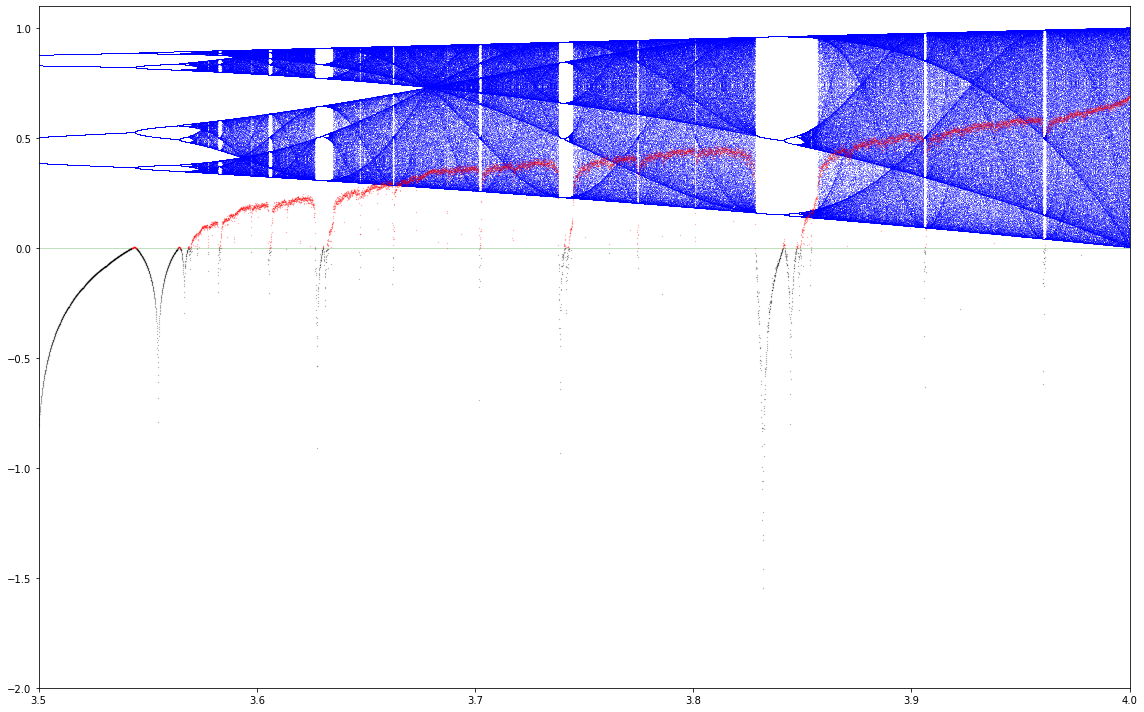

In [7]:
lyapunov(f,10000, 1000, 100, 3.5)